## importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extract Dataset

In [2]:
df=pd.read_csv("Mall_Customers.csv")

## Basic Checks

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## data Validation

In [9]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [10]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [11]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## univariate Analysis

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
df.drop("CustomerID",axis=1,inplace=True)

In [14]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [15]:
df=df.rename(columns={"Annual Income (k$)":"Annual Income","Spending Score (1-100)":"Spending Score"})

In [16]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Data Visualization

In [17]:
df.corr()

,Age,Annual Income,Spending Score
Age,1.000000,-0.012398,-0.327227
Annual Income,-0.012398,1.000000,0.009903
Spending Score,-0.327227,0.009903,1.000000


<AxesSubplot:>

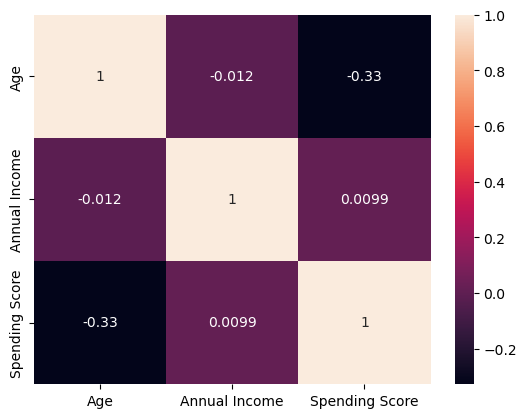

In [18]:
sns.heatmap(df.corr(), annot=True)

In [19]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Age'>

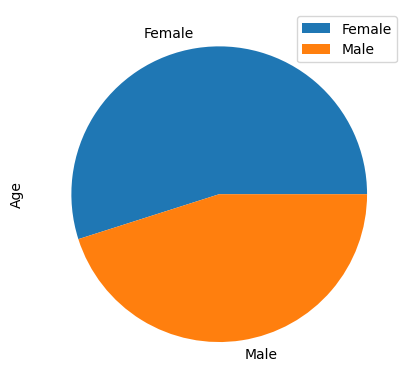

In [21]:
df.groupby(['Gender']).sum().plot(kind='pie', y='Age')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

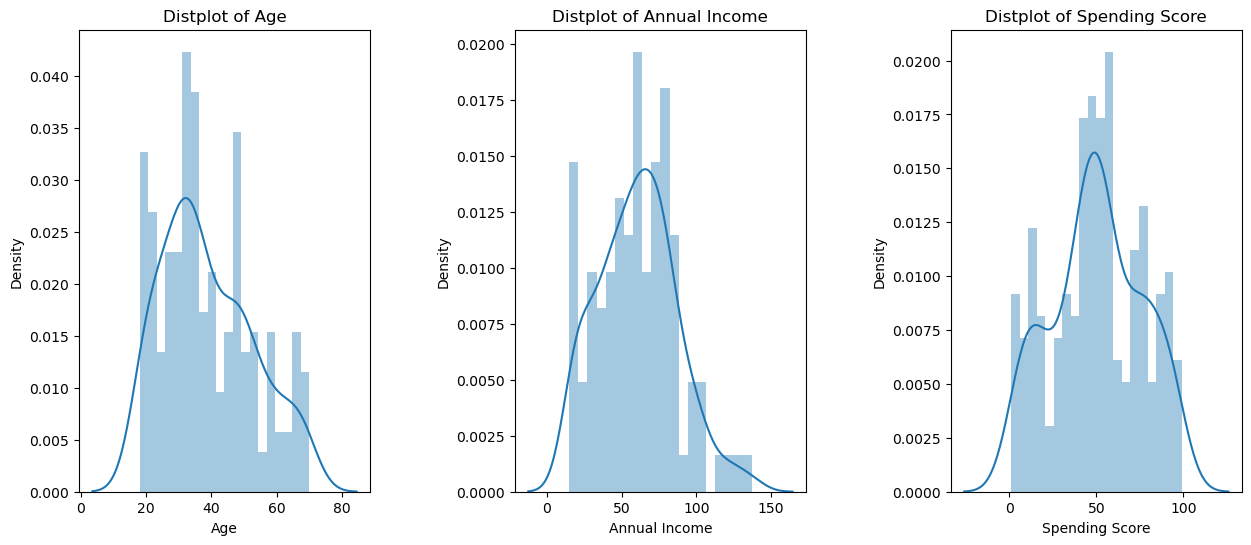

In [22]:
plt.figure(1,figsize=(15,6))
n=0
for x in ["Age","Annual Income","Spending Score"]:
    n +=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

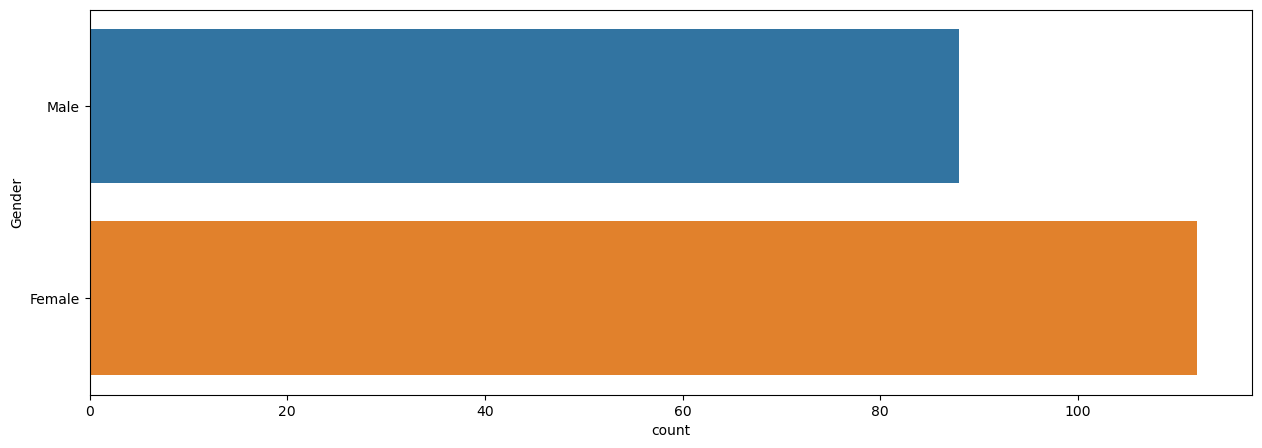

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender",data=df)
plt.show()

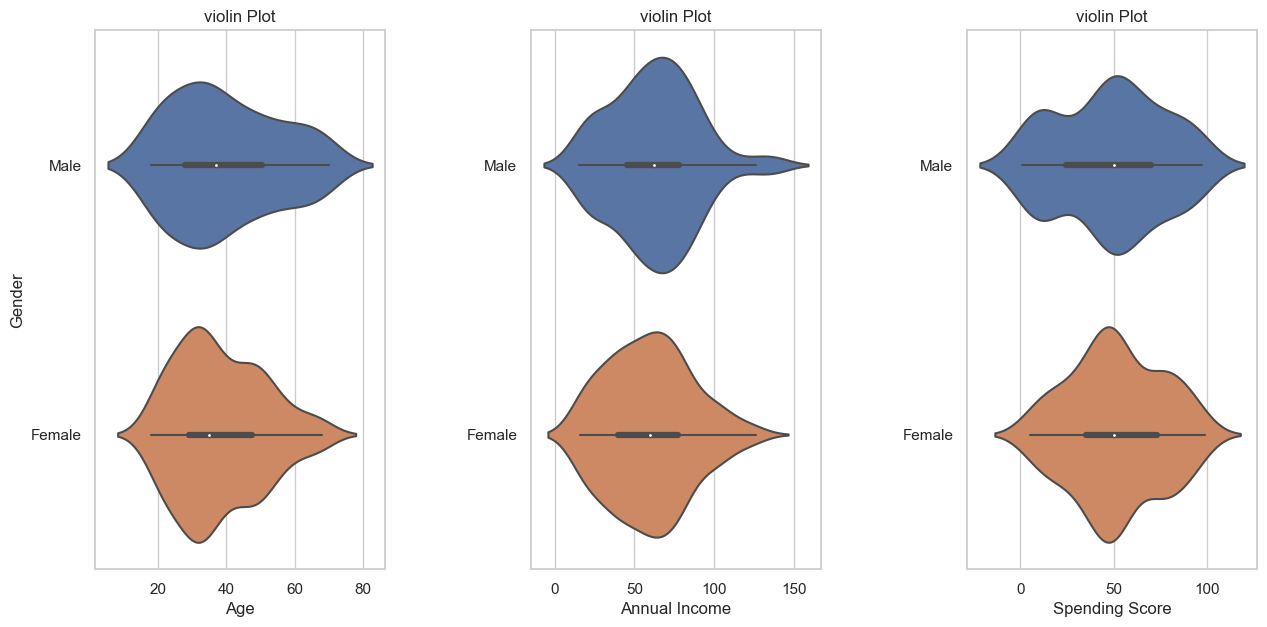

In [25]:
plt.figure(1,figsize=(15,7))
n=0
for col in ["Age","Annual Income","Spending Score"]:
    n +=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=col,y="Gender",data=df)
    plt.ylabel("Gender" if n==1 else '')
    plt.title("violin Plot")
plt.show()

In [34]:
age_18_25=df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55=df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above=df.Age[(df.Age>=56)]
                   
agex = ["18-25","26-35","36-45","46-55","55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x="agex",y="agey",palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


'age_18_25=df.Age[(df.Age>=18) & (df.Age<=25)]\nage_26_35=df.Age[(df.Age>=26) & (df.Age<=35)]\nage_36_45=df.Age[(df.Age>=36) & (df.Age<=45)]\nage_46_55=df.Age[(df.Age>=46) & (df.Age<=55)]\nage_55above=df.Age[(df.Age>=56)]\n                   \nagex = ["18-25","26-35","36-45","46-55","55+"]\nagey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]\nplt.figure(figsize=(15,6))\nsns.barplot(x="agex",y="agey",palette="mako")\nplt.title("Number of Customer and Ages")\nplt.xlabel("Age")\nplt.ylabel("Number of Customer")\nplt.show()'

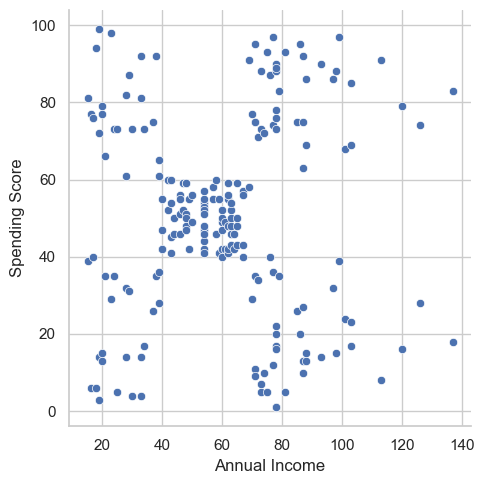

In [35]:
sns.relplot(x="Annual Income",y="Spending Score",data=df)